# Informações

## Integrantes:
  - Marcos oliveira de Freitas
  - Luiz Felipe Balaminute     
  - Victor Simon Paulo         

## Proposta do Projeto:
  Escolha um problema que envolva dados geográficos que você ache interessante de analisar e para este
  problema:
  1. Colete os dados geográficos e históricos necessários para o desenvolvimento do projeto. Caso sejam
  usadas fontes de dados que não são de serviços que fornecem uma API, a fonte destes dados deve ser
  mencionada na entrega;
  2. Armazene este dados de alguma forma (pode ser tanto em arquivos JSON como no PostgreSQL usando
  o PostGIS, ou em um arquivo do DuckDB);
  3. Utilize um notebook para fazer visualizações dos dados e exibir quais informações estão armazenadas
  e levantar possíveis estudos que podem ser feitos a partir dos dados coletados;
  4. A última célula do seu notebook deve conter uma proposta de análise dos dados como resultado das
  informações que foram exibidas nas células anteriores

## Escolha de Dataset:

  Escolhemos o dataset World Happiness Report porque ele mostra como as pessoas em diferentes países avaliam sua própria felicidade. O tema é interessante, atual e permite analisar fatores sociais e econômicos que influenciam a qualidade de vida.

  Além disso:

  - Os dados são organizados por país, o que facilita a análise geográfica;

  - O conjunto tem várias variáveis úteis, como PIB per capita, suporte social e expectativa de vida;

  - É um dataset confiável, atualizado e de acesso livre (Kaggle), o que facilita o uso no projeto.

  A partir dele, conseguimos criar visualizações e análises que ajudam a entender como a felicidade varia no mundo e o que pode influenciar esses resultados.

  Link dataset: https://www.kaggle.com/datasets/unsdsn/world-happiness

#Projeto de Geo Localização Pt. *1*



In [2]:
!pip install kagglehub duckdb matplotlib pandas plotly

In [3]:
import kagglehub
import os
import pandas as pd
import duckdb
import matplotlib.pyplot as plt
import plotly.express as px
from google.colab import files


In [4]:
# Baixar o dataset
path = kagglehub.dataset_download("unsdsn/world-happiness")

print("Caminho para os arquivos:", path)
print("Arquivos disponíveis:", os.listdir(path))

Caminho para os arquivos: /kaggle/input/world-happiness
Arquivos disponíveis: ['2015.csv', '2017.csv', '2019.csv', '2018.csv', '2016.csv']


In [5]:
# Ajuste conforme o ano
df = pd.read_csv(f"{path}/2019.csv")
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [6]:
# Conectar/criar o banco de dados DuckDB
con = duckdb.connect(database='felicidade.duckdb', read_only=False)

con.execute("CREATE TABLE IF NOT EXISTS felicidade AS SELECT * FROM df")

con.execute("SELECT * FROM felicidade LIMIT 5").fetchdf()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [7]:
# Baixar o arquivo do banco criado
files.download('felicidade.duckdb')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

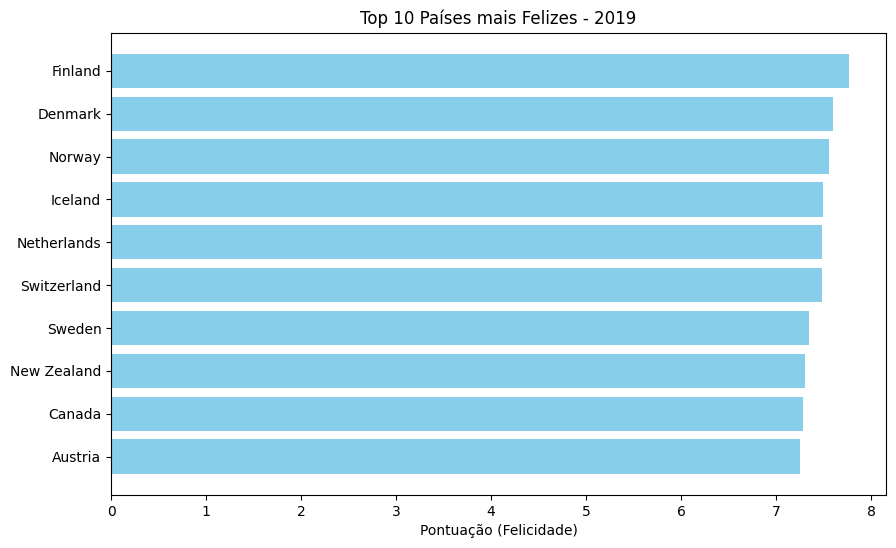

In [8]:
# DuckDB Top 10
top10 = con.execute("""
    SELECT "Country or region", "Score"
    FROM felicidade
    ORDER BY "Score" DESC
    LIMIT 10
""").fetchdf()

plt.figure(figsize=(10,6))
plt.barh(top10["Country or region"], top10["Score"], color='skyblue')
plt.xlabel("Pontuação (Felicidade)")
plt.title("Top 10 Países mais Felizes - 2019")
plt.gca().invert_yaxis()
plt.show()


In [9]:
# DuckDB
df_mapa = con.execute("""
    SELECT "Country or region", "Score"
    FROM felicidade
""").fetchdf()

# Mapa
fig = px.choropleth(
    df_mapa,
    locations="Country or region",
    locationmode="country names",
    color="Score",
    hover_name="Country or region",
    color_continuous_scale="RdYlGn",
    range_color=[df_mapa["Score"].min(), df_mapa["Score"].max()],
    title="Mapa da Felicidade Global - World Happiness Report 2019"
)
fig.show()

##Analise Futura:

A partir dos dados disponíveis no World Happiness Report, podemos explorar questões como:

- A relação entre a felicidade e o PIB per capita, expectativa de vida, generosidade e corrupção percebida.
- Comparações regionais entre continentes ou grupos econômicos (ex: OCDE vs países em desenvolvimento).
- Evolução histórica (se incluirmos dados de outros anos no futuro).

# Projeto de Geo Localização Pt. 2



In [1]:
!pip install kagglehub duckdb matplotlib pandas plotly

In [10]:
import kagglehub
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [11]:
# Baixar o dataset
path = kagglehub.dataset_download("unsdsn/world-happiness")

print("Caminho para os arquivos:", path)
print("Arquivos disponíveis:", os.listdir(path))

Caminho para os arquivos: /kaggle/input/world-happiness
Arquivos disponíveis: ['2015.csv', '2017.csv', '2019.csv', '2018.csv', '2016.csv']


In [12]:
# Padronização e Interpolação

# Dicionário com mapeamento por ano para padronização das colunas
colunas_padrao = {
    "country": ["country", "country_or_region"],
    "score": ["happiness_score", "happiness.score", "score"],
    "rank": ["happiness_rank", "happiness.rank", "overall_rank"],
    "gdp_per_capita": ["economy_(gdp_per_capita)", "economy..gdp.per.capita.", "gdp_per_capita"],
    "social_support": ["family", "social_support"],
    "life_expectancy": ["health_(life_expectancy)", "health..life.expectancy.", "healthy_life_expectancy"],
    "freedom": ["freedom", "freedom_to_make_life_choices"],
    "generosity": ["generosity"],
    "corruption": ["trust_(government_corruption)", "trust..government.corruption.", "perceptions_of_corruption"]
}

anos = [2015, 2016, 2017, 2018, 2019]
dfs = []

for ano in anos:
    df = pd.read_csv(f"{path}/{ano}.csv")
    df["ano"] = ano


    df.columns = (
        df.columns.str.strip()
        .str.lower()
        .str.replace(" ", "_")
        .str.replace("(", "")
        .str.replace(")", "")
        .str.replace(".", "", regex=False)
    )


    df_padronizado = pd.DataFrame()
    for col_padrao, col_variantes in colunas_padrao.items():
        for variante in col_variantes:
            variante = (
                variante.lower()
                .replace(" ", "_")
                .replace("(", "")
                .replace(")", "")
                .replace(".", "")
            )
            if variante in df.columns:
                df_padronizado[col_padrao] = df[variante]
                break
        else:
            df_padronizado[col_padrao] = None

    df_padronizado["ano"] = ano
    dfs.append(df_padronizado)

df_total = pd.concat(dfs, ignore_index=True)

df_total.sort_values(by=["country", "ano"], inplace=True)

colunas_para_interpolar = [
    'score', 'gdp_per_capita', 'social_support',
    'life_expectancy', 'freedom', 'generosity', 'corruption'
]

df_total[colunas_para_interpolar] = (
    df_total.groupby('country')[colunas_para_interpolar]
    .transform(lambda grupo: grupo.interpolate(method='linear'))
)

print("Valores ausentes após interpolação:")
print(df_total[colunas_para_interpolar].isna().sum())

print("\nVisualização do DataFrame:")
print(df_total.head())


Valores ausentes após interpolação:
score              0
gdp_per_capita     0
social_support     0
life_expectancy    0
freedom            0
generosity         0
corruption         0
dtype: int64

Visualização do DataFrame:
         country  score  rank  gdp_per_capita  social_support  \
152  Afghanistan  3.575   153        0.319820        0.302850   
311  Afghanistan  3.360   154        0.382270        0.110370   
455  Afghanistan  3.794   141        0.401477        0.581543   
614  Afghanistan  3.632   145        0.332000        0.537000   
779  Afghanistan  3.203   154        0.350000        0.517000   

     life_expectancy  freedom  generosity  corruption   ano  
152         0.303350  0.23414    0.365100    0.097190  2015  
311         0.173440  0.16430    0.312680    0.071120  2016  
455         0.180747  0.10618    0.311871    0.061158  2017  
614         0.255000  0.08500    0.191000    0.036000  2018  
779         0.361000  0.00000    0.158000    0.025000  2019  


In [20]:
# Agrupar por país e calcular a média do Score (felicidade)
df_media_felicidade = (
    df_total.groupby('country')['score']
    .mean()
    .reset_index()
    .rename(columns={'country': 'Country or region', 'score': 'Score'})
)

# Mapa
fig = px.choropleth(
    df_media_felicidade,
    locations="Country or region",
    locationmode="country names",
    color="Score",
    hover_name="Country or region",
    color_continuous_scale="RdYlGn",
    range_color=[df_media_felicidade["Score"].min(), df_media_felicidade["Score"].max()],
    title="Mapa da Felicidade Média Global (2015~2019)"
)
fig.show()

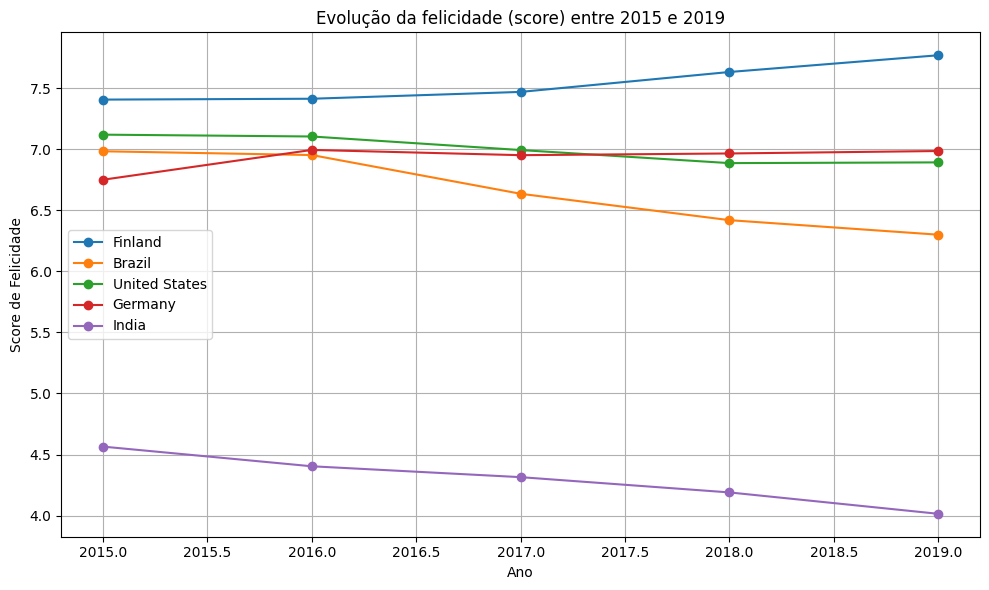

In [19]:
# Evolução da felicidade ao longo dos anos (2015 ~ 2019)

paises = ['Finland', 'Brazil', 'United States', 'Germany', 'India']

plt.figure(figsize=(10, 6))

for pais in paises:
    dados_pais = df_total[df_total['country'] == pais]
    plt.plot(dados_pais['ano'], dados_pais['score'], marker='o', label=pais)

plt.title("Evolução da felicidade (score) entre 2015 e 2019")
plt.xlabel("Ano")
plt.ylabel("Score de Felicidade")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

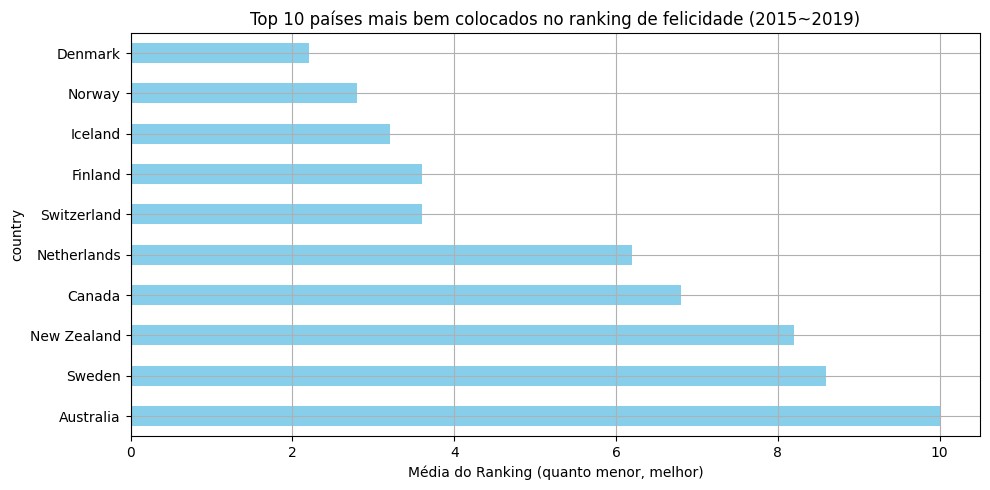

In [17]:
# Ranking médio por país (2015 ~ 2019)

df_rank = df_total.dropna(subset=['rank'])

ranking_medio = df_rank.groupby("country")["rank"].mean().sort_values()

top10_rank = ranking_medio.head(10)

plt.figure(figsize=(10, 5))
top10_rank.plot(kind='barh', color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Média do Ranking (quanto menor, melhor)")
plt.title("Top 10 países mais bem colocados no ranking de felicidade (2015~2019)")
plt.grid(True)
plt.tight_layout()
plt.show()

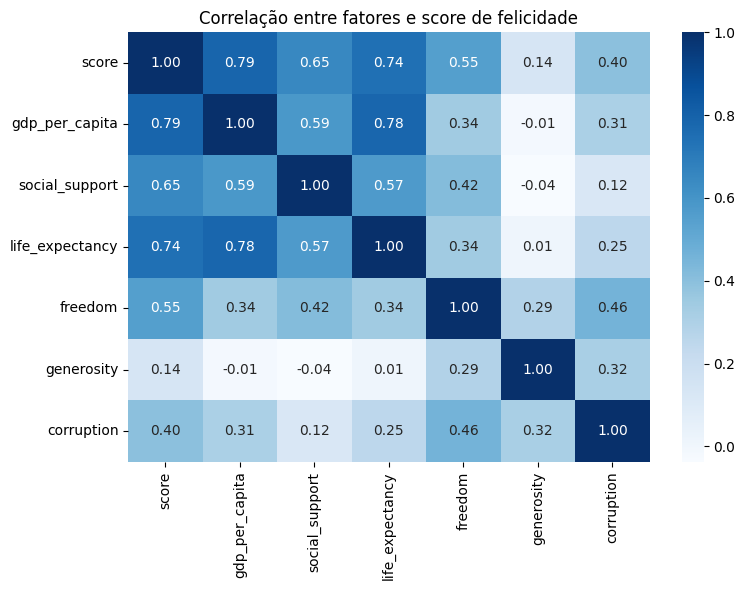

In [18]:
# Correlação entre fatores e a pontuação de felicidade

fatores = ['score', 'gdp_per_capita', 'social_support', 'life_expectancy', 'freedom', 'generosity', 'corruption']
df_corr = df_total[fatores].dropna()

correlacoes = df_corr.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlacoes, annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlação entre fatores e score de felicidade")
plt.tight_layout()
plt.show()

## Conclusão

- A análise realizada com dados do World Happiness Report entre 2015 e 2019 permitiu identificar padrões interessantes sobre a percepção de felicidade no mundo. Observamos, por exemplo, que países como Finlândia, Noruega e Dinamarca mantêm altos índices de felicidade de forma consistente ao longo dos anos. Já países como Índia e Brasil apresentaram oscilações significativas.

- Além disso, a análise de correlação revelou que fatores como suporte social, PIB per capita e expectativa de vida têm forte relação com o índice de felicidade, enquanto a generosidade e a percepção de corrupção mostraram correlações mais fracas.

- Esses resultados reforçam a ideia de que a felicidade de uma população está fortemente ligada a fatores socioeconômicos estruturais e que políticas públicas voltadas ao bem-estar social podem ter impacto direto na qualidade de vida percebida.
